# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousedupes = combined_mouse_df.loc[combined_mouse_df.duplicated(['Mouse ID','Timepoint']), 'Mouse ID'].unique()
mousedupes

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedupes = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
mousedupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combined_mouse_df[combined_mouse_df["Mouse ID"] != "g989"]
cleaned_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_stats = cleaned_mouse_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = mouse_stats["Tumor Volume (mm3)"].mean()
variances = mouse_stats["Tumor Volume (mm3)"].var()
medians = mouse_stats["Tumor Volume (mm3)"].median()
stds = mouse_stats["Tumor Volume (mm3)"].std()
sems = mouse_stats["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summarydf = pd.DataFrame({
    "Mean": means.values,
    "Variance": variances.values,
    "Median": medians.values,
    "Standard Deviation": stds.values,
    "SEM": sems.values
},index = means.index)
summarydf


,Mean,Variance,Median,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,41.557809,4.994774,0.329346
Ceftamin,52.591172,39.290177,51.776157,6.268188,0.469821
Infubinol,52.884795,43.128684,51.820584,6.567243,0.492236
Ketapril,55.235638,68.553577,53.698743,8.279709,0.603860
Naftisol,54.331565,66.173479,52.509285,8.134708,0.596466
Placebo,54.033581,61.168083,52.288934,7.821003,0.581331
Propriva,52.320930,43.852013,50.446266,6.622085,0.544332
Ramicane,40.216745,23.486704,40.673236,4.846308,0.320955
Stelasyn,54.233149,59.450562,52.431737,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

mouse_stats["Tumor Volume (mm3)"].agg(["mean","var","median","std","sem"])

,mean,var,median,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,41.557809,4.994774,0.329346
Ceftamin,52.591172,39.290177,51.776157,6.268188,0.469821
Infubinol,52.884795,43.128684,51.820584,6.567243,0.492236
Ketapril,55.235638,68.553577,53.698743,8.279709,0.603860
Naftisol,54.331565,66.173479,52.509285,8.134708,0.596466
Placebo,54.033581,61.168083,52.288934,7.821003,0.581331
Propriva,52.320930,43.852013,50.446266,6.622085,0.544332
Ramicane,40.216745,23.486704,40.673236,4.846308,0.320955
Stelasyn,54.233149,59.450562,52.431737,7.710419,0.573111


## Bar and Pie Charts

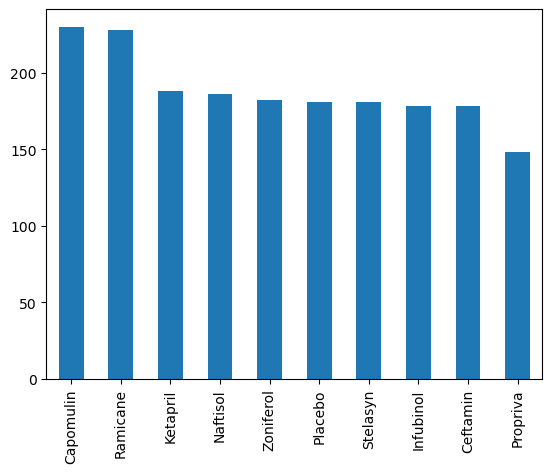

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#cleaned_mouse_df.columns
counts = cleaned_mouse_df["Drug Regimen"].value_counts()

# Configure plot, figsize, title and axis labels
counts.plot(kind = "bar")
plt.xlabel = ("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel = ("# of Observed Mouse Timepoints")

# Show plot
plt.show()

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

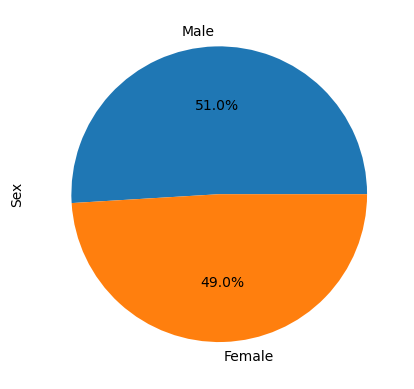

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


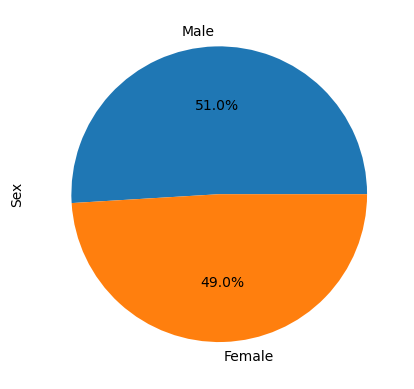

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


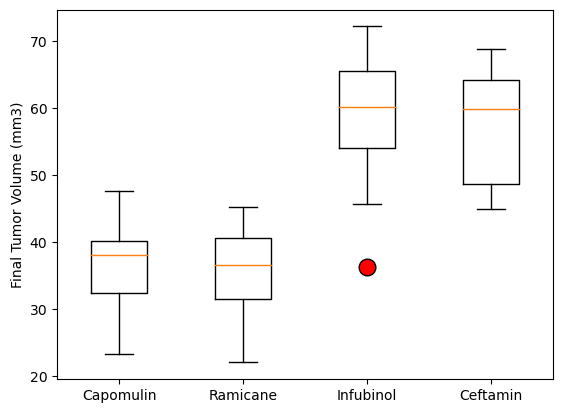

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

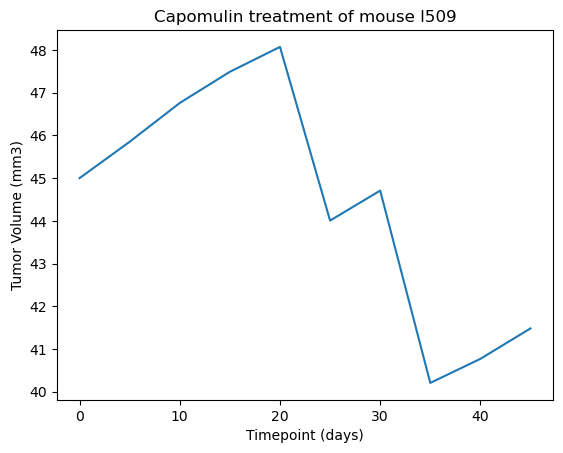

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


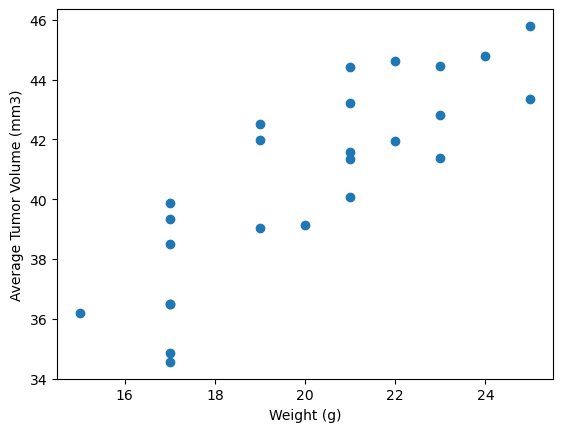

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


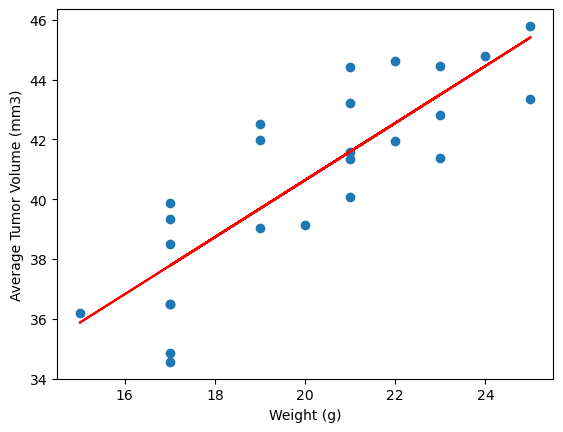

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
